In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Fraud_loan_prediction.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.Loan_ID.value_counts()

LP002449    1
LP002142    1
LP002143    1
LP002008    1
LP002447    1
LP002837    1
LP001387    1
LP001259    1
LP001907    1
LP002615    1
LP002493    1
LP001264    1
LP002961    1
LP001936    1
LP001098    1
LP002407    1
LP001644    1
LP001977    1
LP001518    1
LP002978    1
LP002237    1
LP002140    1
LP002272    1
LP002398    1
LP001883    1
LP001750    1
LP002170    1
LP002332    1
LP001422    1
LP001532    1
           ..
LP001792    1
LP001013    1
LP002239    1
LP002600    1
LP001207    1
LP001024    1
LP001199    1
LP002894    1
LP002051    1
LP002180    1
LP002367    1
LP002778    1
LP001972    1
LP001819    1
LP001443    1
LP002753    1
LP002948    1
LP002625    1
LP001945    1
LP002035    1
LP001877    1
LP001519    1
LP002626    1
LP001910    1
LP002361    1
LP002263    1
LP001647    1
LP001011    1
LP001256    1
LP001280    1
Name: Loan_ID, Length: 614, dtype: int64

In [4]:
data=data.drop('Loan_ID',axis=1)

In [5]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

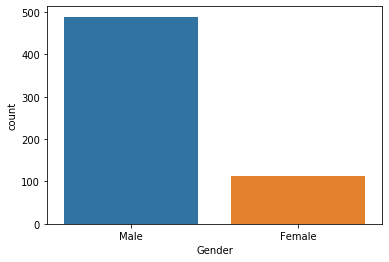

In [6]:
sns.countplot(data.Gender)

In [7]:
data['Gender'].mode()

0    Male
dtype: object

In [8]:
data['Gender'].fillna('Male',inplace=True)

In [9]:
data['Married'].mode()

0    Yes
dtype: object

In [10]:
data.Married.fillna('Yes',inplace=True)

In [11]:
data.head(50)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [12]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
data.Dependents.fillna(0,inplace=True)

In [14]:
data['Dependents']=data['Dependents'].map({'3+':4,'0':0,'1':1,'2':2})

In [15]:
data.Dependents.dropna(inplace=True)

In [16]:
data.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
sc=LabelEncoder()
status=sc.fit_transform(data.Loan_Status)
data['Loan_status']=pd.DataFrame(status)

In [18]:
data.drop('Loan_Status',axis=1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,1
7,Male,Yes,4.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,0
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,1
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,0


In [19]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1


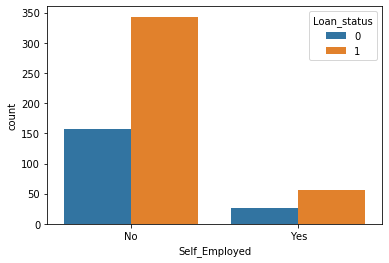

In [20]:
sns.countplot(x='Self_Employed',hue='Loan_status',data=data)

In [21]:
data.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [22]:
data.Self_Employed.fillna('No',inplace=True)

In [23]:
data.LoanAmount.median()

128.0

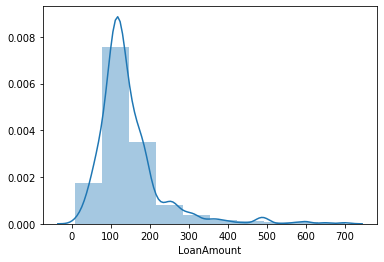

In [24]:
sns.distplot(data.LoanAmount,bins=10)

In [25]:
data.LoanAmount.fillna(128,inplace=True)

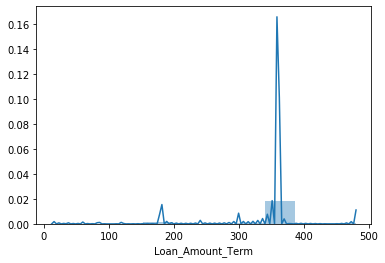

In [26]:
sns.distplot(data.Loan_Amount_Term,bins=10)

In [27]:
data.Loan_Amount_Term.fillna(360,inplace=True)

In [28]:
data.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [29]:
data.Credit_History.fillna(1.0,inplace=True)

In [30]:
data.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
Loan_status           0
dtype: int64

In [31]:
data.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
Loan_status            int32
dtype: object

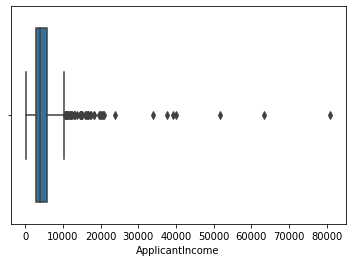

In [32]:
sns.boxplot(data.ApplicantIncome)

In [33]:
data.shape

(614, 13)

In [34]:
data=data[data['ApplicantIncome']<7500]

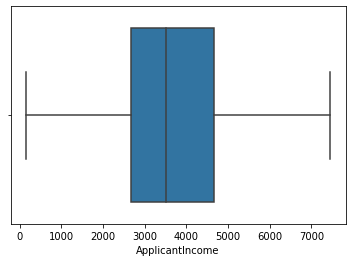

In [35]:
sns.boxplot(data.ApplicantIncome)

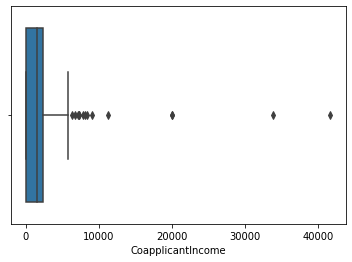

In [36]:
sns.boxplot(data.CoapplicantIncome)

In [37]:
data=data[data['CoapplicantIncome']<6200]

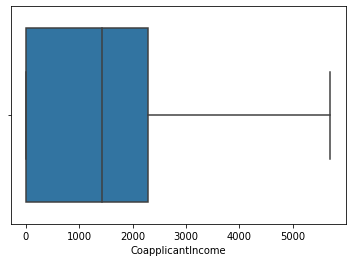

In [38]:
sns.boxplot(data.CoapplicantIncome)

In [39]:
data.shape

(507, 13)

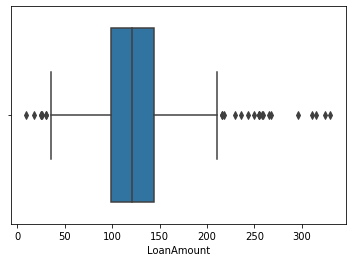

In [40]:
sns.boxplot(data.LoanAmount)

In [41]:
data=data[(data['LoanAmount']<200) & (data['LoanAmount']>40)]

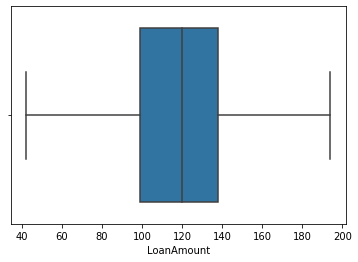

In [42]:
sns.boxplot(data.LoanAmount)

In [43]:
data.shape

(466, 13)

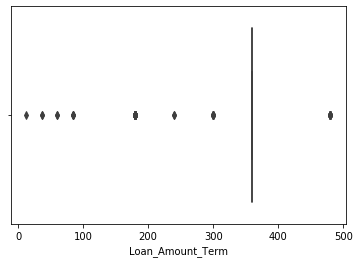

In [44]:
sns.boxplot(data.Loan_Amount_Term)

In [45]:
data.Loan_Amount_Term.value_counts()

360.0    402
180.0     31
480.0     14
300.0      8
84.0       4
36.0       2
60.0       2
240.0      2
12.0       1
Name: Loan_Amount_Term, dtype: int64

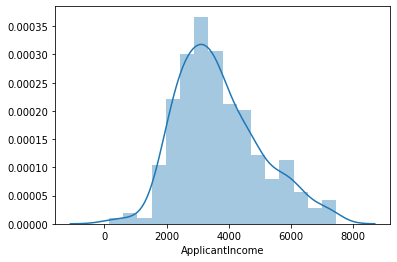

In [46]:
sns.distplot(data.ApplicantIncome)

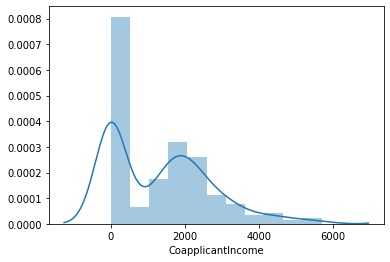

In [47]:
sns.distplot(data.CoapplicantIncome)

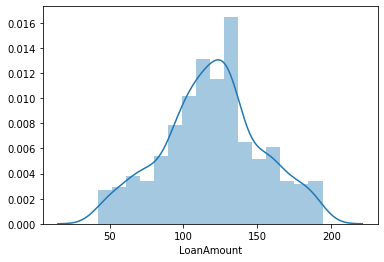

In [48]:
sns.distplot(data.LoanAmount)

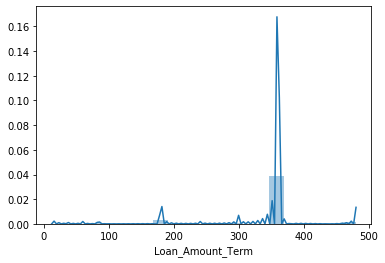

In [49]:
sns.distplot(data.Loan_Amount_Term)

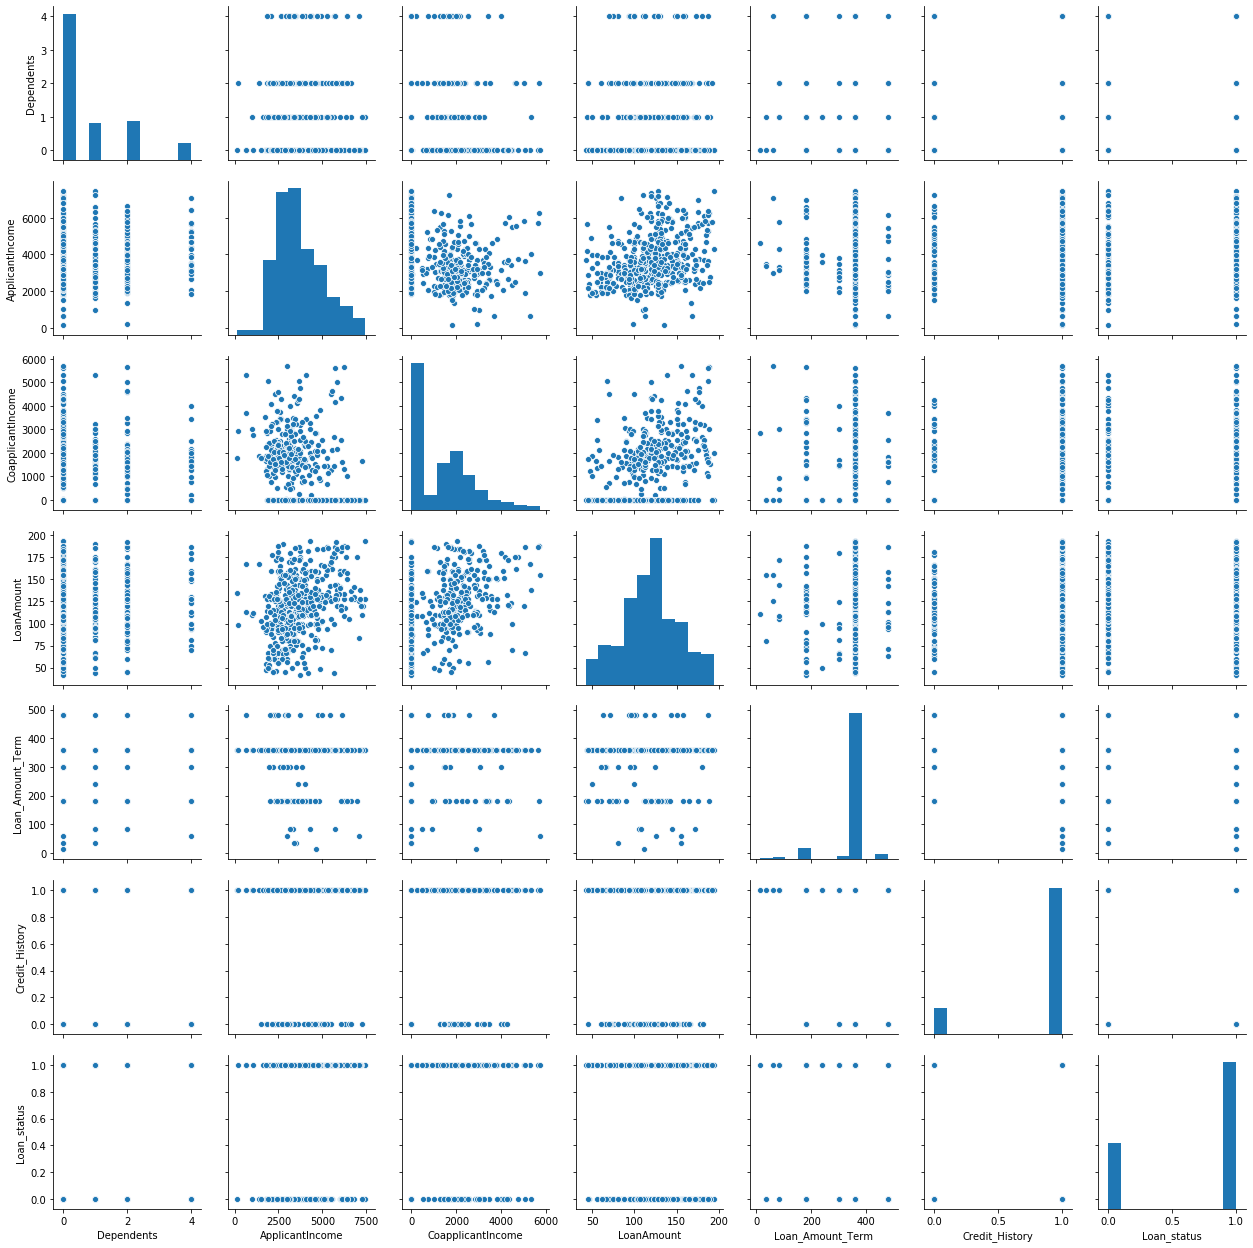

In [50]:
sns.pairplot(data)

In [51]:
data.skew()

Dependents           1.532496
ApplicantIncome      0.600087
CoapplicantIncome    0.748116
LoanAmount          -0.031393
Loan_Amount_Term    -2.483116
Credit_History      -1.940970
Loan_status         -0.818423
dtype: float64

In [52]:
data1=data

In [53]:
for col in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_status']:
    if data1.skew().loc[col]>0.55:
        data1[col]=np.sqrt(data1[col])
    elif data1.skew().loc[col]<-0.55:
        data1[col]=np.power(data1[col],4)

In [54]:
data1.skew()

Dependents           1.532496
ApplicantIncome     -0.060782
CoapplicantIncome   -0.031704
LoanAmount          -0.031393
Loan_Amount_Term     2.301029
Credit_History      -1.940970
Loan_status         -0.818423
dtype: float64

In [55]:
for col in ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Loan_status']:
    if data1.skew().loc[col]>0.55:
        data1[col]=np.sqrt(data1[col])
    elif data1.skew().loc[col]<-0.55:
        data1[col]=np.power(data1[col],4)

In [56]:
data1.skew()

Dependents           1.532496
ApplicantIncome     -0.060782
CoapplicantIncome   -0.031704
LoanAmount          -0.031393
Loan_Amount_Term    -1.041246
Credit_History      -1.940970
Loan_status         -0.818423
dtype: float64

In [57]:
data=data1

In [58]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [59]:
data['Married']=data['Married'].map({'Yes':1,'No':0})

In [60]:
data['Education']=data['Education'].map({'Graduate':1,'Not Graduate':0})

In [61]:
data.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [62]:
data['Property_Area']=data['Property_Area'].map({'Urban':1,'Rural':2,'Semiurban':3})

In [63]:
data['Self_Employed']=data['Self_Employed'].map({'Yes':1,'No':0})

In [64]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_status
0,1,0,0.0,1,0,76.478755,0.000000,128.0,129600.0,1.0,1,Y,1
1,1,1,1.0,1,0,67.697858,38.832976,128.0,129600.0,1.0,2,N,0
2,1,1,0.0,1,1,54.772256,0.000000,66.0,129600.0,1.0,1,Y,1
3,1,1,0.0,0,0,50.823223,48.559242,120.0,129600.0,1.0,1,Y,1
4,1,0,0.0,1,0,77.459667,0.000000,141.0,129600.0,1.0,1,Y,1


In [65]:
data.drop('Loan_Status',axis=1,inplace=True)

In [66]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_status
0,1,0,0.0,1,0,76.478755,0.000000,128.0,129600.0,1.0,1,1
1,1,1,1.0,1,0,67.697858,38.832976,128.0,129600.0,1.0,2,0
2,1,1,0.0,1,1,54.772256,0.000000,66.0,129600.0,1.0,1,1
3,1,1,0.0,0,0,50.823223,48.559242,120.0,129600.0,1.0,1,1
4,1,0,0.0,1,0,77.459667,0.000000,141.0,129600.0,1.0,1,1


In [67]:
from sklearn.naive_bayes import BernoulliNB as BNB
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.linear_model import LogisticRegression as LR

In [68]:
BNB=BNB()
GNB=GNB()
KNN=KNN(n_neighbors=6)
DTC=DTC()
SV=SVC()
LR=LR()
RFC=RFC(max_depth=4,random_state=42)

In [69]:
models=[]
models.append(('BernoulliNB',BNB))
models.append(('GaussianNB',GNB))
models.append(('KNeighborsClassifier',KNN))
models.append(('DecisionTreeClassifier',DTC))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('RandomForestClassifier',RFC))
models

[('BernoulliNB',
  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)),
 ('GaussianNB', GaussianNB(priors=None, var_smoothing=1e-09)),
 ('KNeighborsClassifier',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                       weights='uniform')),
 ('DecisionTreeClassifier',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=None, splitter='best')),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probab

In [70]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score

In [71]:
data_in=data.drop(['Loan_status','Dependents'],axis=1)
data_op=data.Loan_status

In [72]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data_inp=sc.fit_transform(data_in)
data_in=pd.DataFrame(data_inp,columns=data_in.columns)

In [73]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(data_in,data_op,stratify=data_op,test_size=0.33)
from sklearn.model_selection import KFold

In [74]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************',name,'********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    y_pred=model.predict(x_test)
    print('\n')
    accuracy=accuracy_score(y_test,y_pred)
    print('Accuracy score=',accuracy)
    score.append(accuracy)
    print('\n')
    kf = KFold(shuffle=True, n_splits=5)
    sc=cross_val_score(model,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('cross_value score=',sc)
    cvs.append(sc)
    print('\n')
    rocscor=roc_auc_score(y_test,y_pred)
    print('Roc_score=',rocscor)
    rocscore.append(rocscor)
    print('\n')
    c=confusion_matrix(y_test,y_pred)
    print('confusion Matrix:')
    print(c)
    

****************** BernoulliNB ********************


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)


Accuracy score= 0.8051948051948052


cross_value score= 0.8197208876687258


Roc_score= 0.6988993710691824


confusion Matrix:
[[ 20  28]
 [  2 104]]
****************** GaussianNB ********************


GaussianNB(priors=None, var_smoothing=1e-09)


Accuracy score= 0.7987012987012987


cross_value score= 0.8110958590711508


Roc_score= 0.6941823899371069


confusion Matrix:
[[ 20  28]
 [  3 103]]
****************** KNeighborsClassifier ********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy score= 0.7922077922077922


cross_value score= 0.7703500343170899


Roc_score= 0.7122641509433962


confusion Matrix:
[[24 24]
 [ 8 98]]
****************** DecisionTreeClassifier ********************


DecisionTr

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr=LogisticRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.33,stratify=data_op)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('accuracy score at',i,'is',accuracy)
    if accuracy>max_score:
        max_score=accuracy
        final_state=i
print('max accuracy is ',max_score,'at',final_state)

accuracy score at 0 is 0.8116883116883117
accuracy score at 1 is 0.7857142857142857
accuracy score at 2 is 0.7792207792207793
accuracy score at 3 is 0.8116883116883117
accuracy score at 4 is 0.8116883116883117
accuracy score at 5 is 0.8116883116883117
accuracy score at 6 is 0.7662337662337663
accuracy score at 7 is 0.7987012987012987
accuracy score at 8 is 0.8376623376623377
accuracy score at 9 is 0.8376623376623377
accuracy score at 10 is 0.8246753246753247
accuracy score at 11 is 0.7987012987012987
accuracy score at 12 is 0.8246753246753247
accuracy score at 13 is 0.8051948051948052
accuracy score at 14 is 0.8116883116883117
accuracy score at 15 is 0.8246753246753247
accuracy score at 16 is 0.8441558441558441
accuracy score at 17 is 0.7987012987012987
accuracy score at 18 is 0.8246753246753247
accuracy score at 19 is 0.8246753246753247
accuracy score at 20 is 0.8246753246753247
accuracy score at 21 is 0.7987012987012987
accuracy score at 22 is 0.7987012987012987
accuracy score at 23 

In [76]:
x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=82,test_size=0.33,stratify=data_op)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
train_pred=lr.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
accuracy,accuracy1

(0.8636363636363636, 0.7980769230769231)

In [77]:
c=confusion_matrix(y_test,y_pred)
c

array([[ 31,  17],
       [  4, 102]], dtype=int64)

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [79]:
lr_test_auc=roc_auc_score(y_test,y_pred)
lr_train_auc=roc_auc_score(y_train,train_pred)

In [80]:
lr_test_auc,lr_train_auc

(0.8040487421383646, 0.6922320786382161)

In [81]:
lr_test_probs=lr.predict_proba(x_test)
lr_train_probs=lr.predict_proba(x_train)
lr_test_probs=lr_test_probs[:,1]
lr_train_probs=lr_train_probs[:,1]

In [82]:
lr_test_fpr,lr_test_tpr,test_threshold=roc_curve(y_test,lr_test_probs)
lr_train_fpr,lr_train_tpr,train_threshold=roc_curve(y_train,lr_train_probs)

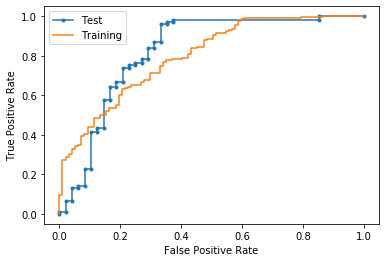

In [83]:
plt.plot(lr_test_fpr,lr_test_tpr,marker='.',label='Test')
plt.plot(lr_train_fpr,lr_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [84]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf',random_state=20)
classifier.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=20,
    shrinking=True, tol=0.001, verbose=False)

In [85]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search=GridSearchCV(estimator=classifier,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [86]:
accuracy=grid_search.best_score_
accuracy

0.8012820512820513

In [87]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [88]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=35,C=10,gamma=0.1,probability=True)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
train_pred=classifier.predict(x_train)
accuracy=accuracy_score(y_test,y_pred)
accuracy1=accuracy_score(y_train,train_pred)
print(accuracy,accuracy1)
c=confusion_matrix(y_test,y_pred)
c

0.8571428571428571 0.8012820512820513


array([[ 28,  20],
       [  2, 104]], dtype=int64)

In [89]:
svc_test_auc=roc_auc_score(y_test,y_pred)
svc_train_auc=roc_auc_score(y_train,train_pred)
svc_test_auc,svc_train_auc

(0.7822327044025157, 0.6888995444737473)

In [90]:
svc_test_probs=classifier.predict_proba(x_test)
svc_train_probs=classifier.predict_proba(x_train)
svc_test_probs=svc_test_probs[:,1]
svc_train_probs=svc_train_probs[:,1]

In [91]:
svc_test_fpr,svc_test_tpr,test_threshold=roc_curve(y_test,svc_test_probs)
svc_train_fpr,svc_train_tpr,train_threshold=roc_curve(y_train,svc_train_probs)

In [88]:
plt.plot(svc_test_fpr,svc_test_tpr,marker='.',label='Test')
plt.plot(svc_train_fpr,svc_train_tpr,label='Training')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

NameError: name 'svc_test_fpr' is not defined

In [87]:
for i in range(0,1):
    from sklearn.tree import DecisionTreeClassifier as DTC
    DTC=DTC()
    from sklearn.model_selection import GridSearchCV
    parameters=[{'random_state':range(0,100),'criterion':['gini','entropy'],'max_depth':range(2,8)}]
    grid_search=GridSearchCV(estimator=DTC,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
    grid_search=grid_search.fit(x_train,y_train)
    r=grid_search.best_params_
    from sklearn.tree import DecisionTreeClassifier as DTC
    DTC=DTC(random_state=r['random_state'],criterion=r['criterion'],max_depth=r['max_depth'])
    DTC.fit(x_train,y_train)
    y_pred=DTC.predict(x_test)
    train_pred=DTC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(DTC,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************Decision Tree Classifier*****************')
    print('\n')
    print('Best parameters are:',r)
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')
    

*****************Decision Tree Classifier*****************


Best parameters are: {'criterion': 'gini', 'max_depth': 2, 'random_state': 0}
Testing accuracy: 0.8571428571428571 Training accuracy: 0.8012820512820513
Cross validation score 0.813406543125143
Roc_auc score is: 0.7822327044025157
Confusion matrix:
 [[ 28  20]
 [  2 104]]




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [94]:
for i in range(0,1):
    from sklearn.tree import DecisionTreeClassifier as DTC
    DTC=DTC(random_state=5,criterion='entropy',max_depth=5)
    DTC.fit(x_train,y_train)
    y_pred=DTC.predict(x_test)
    train_pred=DTC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(DTC,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************Decision Tree Classifier*****************')
    print('\n')
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')

*****************Decision Tree Classifier*****************


Testing accuracy: 0.8051948051948052 Training accuracy: 0.8653846153846154
Cross validation score 0.7725463280713797
Roc_auc score is: 0.7501965408805032
Confusion matrix:
 [[29 19]
 [11 95]]




In [89]:
for i in range(0,1):
    from sklearn.naive_bayes import GaussianNB as GNB
    GNB=GNB()
    GNB.fit(x_train,y_train)
    y_pred=GNB.predict(x_test)
    train_pred=GNB.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(GNB,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************GaussianNB Classifier*****************')
    print('\n')
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')

*****************GaussianNB Classifier*****************


Testing accuracy: 0.8246753246753247 Training accuracy: 0.8012820512820513
Cross validation score 0.8002745367192862
Roc_auc score is: 0.7643474842767297
Confusion matrix:
 [[29 19]
 [ 8 98]]




In [90]:
for i in range(0,1):
    from sklearn.naive_bayes import BernoulliNB as BNB
    BNB=BNB()
    BNB.fit(x_train,y_train)
    y_pred=BNB.predict(x_test)
    train_pred=BNB.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(BNB,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************BernoulliNB Classifier*****************')
    print('\n')
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')

*****************BernoulliNB Classifier*****************


Testing accuracy: 0.8506493506493507 Training accuracy: 0.7948717948717948
Cross validation score 0.8197895218485473
Roc_auc score is: 0.7832154088050315
Confusion matrix:
 [[ 29  19]
 [  4 102]]




In [86]:
for i in range(0,1):
    from sklearn.ensemble import GradientBoostingClassifier as GBC
    GBC=GBC()
    from sklearn.model_selection import GridSearchCV
    parameters=[{'random_state':range(0,100),'learning_rate':[0.5],'max_depth':range(2,8),'n_estimators':[100]}]
    grid_search=GridSearchCV(estimator=GBC,param_grid=parameters,scoring='accuracy',cv=10,n_jobs=-1)
    grid_search=grid_search.fit(x_train,y_train)
    r=grid_search.best_params_
    from sklearn.ensemble import GradientBoostingClassifier as GBC
    GBC=GBC(random_state=r['random_state'],learning_rate=r['learning_rate'],max_depth=r['max_depth'],n_estimators=r['n_estimators'])
    GBC.fit(x_train,y_train)
    y_pred=GBC.predict(x_test)
    train_pred=GBC.predict(x_train)
    accuracy=accuracy_score(y_test,y_pred)
    accuracy1=accuracy_score(y_train,train_pred)
    rscore=roc_auc_score(y_test,y_pred)
    c=confusion_matrix(y_test,y_pred)
    kf = KFold(shuffle=True, n_splits=5)
    cv=cross_val_score(GBC,data_in,data_op,cv=kf,scoring='accuracy').mean()
    print('*****************Gradient Boosting Classifier*****************')
    print('\n')
    print('Testing accuracy:',accuracy,'Training accuracy:',accuracy1)
    print('Cross validation score',cv)
    print('Roc_auc score is:',rscore)
    print('Confusion matrix:\n',c)  
    print('\n')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


*****************Gradient Boosting Classifier*****************


Testing accuracy: 0.7597402597402597 Training accuracy: 1.0
Cross validation score 0.7811942347288949
Roc_auc score is: 0.722877358490566
Confusion matrix:
 [[30 18]
 [19 87]]




In [87]:
r

{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 100, 'random_state': 9}

In [ ]:
from sklearn.externals import joblib
joblib.dump(DTC,'DTC_project12.pkl')